ANN, which classifies wine types using multiclass classification + data cleaning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


from tensorflow import keras
from keras.layers import Dense
from keras import Sequential
from keras.utils import to_categorical


/Users/maxkucher/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [213]:
data = pd.read_csv("/Users/maxkucher/data_handling/ML/Wine_Quality.csv")
data

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [214]:
data.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [215]:
miss_data_columns = ["fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides", "pH", "sulphates"]

In [216]:
for column in miss_data_columns:
    medium = round(data[column].mean(), 2)
    data[column] = data[column].fillna(medium)


In [217]:
data.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [218]:
data

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.53,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [219]:
data.quality.value_counts()

quality
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: count, dtype: int64

In [220]:
standart = data[data.quality == 5]


group_1 = data[data.quality == 6]
group_2 = data[data.quality == 7]
group_3 = data[data.quality == 4]
group_4 = data[data.quality == 8]
group_5 = data[data.quality == 3]
group_6 = data[data.quality == 9]

In [221]:
groups = [group_1, group_2, group_3, group_4, group_5, group_6]

for i in range(len(groups)):
    groups[i] = groups[i].sample(len(standart), replace=True, random_state=42)




In [222]:
new_data = pd.concat([groups[0], groups[1], groups[2], groups[3], groups[4], groups[5]], ignore_index=True)
new_data

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.28,0.33,14.6,0.043,47.0,168.0,0.99940,3.34,0.67,8.8,6
1,white,9.7,0.24,0.49,4.9,0.032,3.0,18.0,0.99368,2.85,0.54,10.0,6
2,white,6.6,0.26,0.38,6.5,0.170,68.0,201.0,0.99560,3.19,0.38,9.4,6
3,white,6.6,0.35,0.35,6.0,0.063,31.0,150.0,0.99537,3.10,0.47,9.4,6
4,white,8.0,0.27,0.33,1.2,0.050,41.0,103.0,0.99002,3.00,0.45,12.4,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12823,white,9.1,0.27,0.45,10.6,0.035,28.0,124.0,0.99700,3.20,0.46,10.4,9
12824,white,7.1,0.26,0.49,2.2,0.032,31.0,113.0,0.99030,3.37,0.42,12.9,9
12825,white,9.1,0.27,0.45,10.6,0.035,28.0,124.0,0.99700,3.20,0.46,10.4,9
12826,white,6.9,0.36,0.34,4.2,0.018,57.0,119.0,0.98980,3.28,0.36,12.7,9


In [223]:
new_data.quality.value_counts()

quality
6    2138
7    2138
4    2138
8    2138
3    2138
9    2138
Name: count, dtype: int64

In [224]:
new_data.replace({"quality": {3: 0, 4: 1, 6: 2, 7: 3, 8: 4, 9: 5}}, inplace=True)
new_data.replace({"type": {"white": 0, "red": 1}}, inplace=True)

/var/folders/tl/sxyv3tjs7wlff0fs8dht26pr0000gn/T/ipykernel_13544/651865856.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  new_data.replace({"type": {"white": 0, "red": 1}}, inplace=True)


In [225]:
new_data

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.0,0.28,0.33,14.6,0.043,47.0,168.0,0.99940,3.34,0.67,8.8,2
1,0,9.7,0.24,0.49,4.9,0.032,3.0,18.0,0.99368,2.85,0.54,10.0,2
2,0,6.6,0.26,0.38,6.5,0.170,68.0,201.0,0.99560,3.19,0.38,9.4,2
3,0,6.6,0.35,0.35,6.0,0.063,31.0,150.0,0.99537,3.10,0.47,9.4,2
4,0,8.0,0.27,0.33,1.2,0.050,41.0,103.0,0.99002,3.00,0.45,12.4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12823,0,9.1,0.27,0.45,10.6,0.035,28.0,124.0,0.99700,3.20,0.46,10.4,5
12824,0,7.1,0.26,0.49,2.2,0.032,31.0,113.0,0.99030,3.37,0.42,12.9,5
12825,0,9.1,0.27,0.45,10.6,0.035,28.0,124.0,0.99700,3.20,0.46,10.4,5
12826,0,6.9,0.36,0.34,4.2,0.018,57.0,119.0,0.98980,3.28,0.36,12.7,5


In [226]:
max(data["sulphates"])

2.0

In [227]:
new_data.chlorides.value_counts()

chlorides
0.035    659
0.032    625
0.031    586
0.034    531
0.021    476
        ... 
0.415      1
0.132      1
0.148      1
0.125      1
0.152      1
Name: count, Length: 150, dtype: int64

In [228]:
columns_to_scale = ["fixed acidity", "volatile acidity", "citric acid", "residual sugar", "free sulfur dioxide", "total sulfur dioxide", "pH", "sulphates", "alcohol"]
scaler = MinMaxScaler()



for column in columns_to_scale:
    new_data[column] = scaler.fit_transform(new_data[[column]])


In [229]:
new_data

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,0.271186,0.133333,0.268293,0.213518,0.043,0.159722,0.373272,0.99940,0.480620,0.252809,0.129032,2
1,0,0.500000,0.106667,0.398374,0.064516,0.032,0.006944,0.027650,0.99368,0.100775,0.179775,0.322581,2
2,0,0.237288,0.120000,0.308943,0.089094,0.170,0.232639,0.449309,0.99560,0.364341,0.089888,0.225806,2
3,0,0.237288,0.180000,0.284553,0.081413,0.063,0.104167,0.331797,0.99537,0.294574,0.140449,0.225806,2
4,0,0.355932,0.126667,0.268293,0.007680,0.050,0.138889,0.223502,0.99002,0.217054,0.129213,0.709677,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12823,0,0.449153,0.126667,0.365854,0.152074,0.035,0.093750,0.271889,0.99700,0.372093,0.134831,0.387097,5
12824,0,0.279661,0.120000,0.398374,0.023041,0.032,0.104167,0.246544,0.99030,0.503876,0.112360,0.790323,5
12825,0,0.449153,0.126667,0.365854,0.152074,0.035,0.093750,0.271889,0.99700,0.372093,0.134831,0.387097,5
12826,0,0.262712,0.186667,0.276423,0.053763,0.018,0.194444,0.260369,0.98980,0.434109,0.078652,0.758065,5


In [230]:
x = new_data.drop("quality", axis="columns")
y = new_data["quality"]

In [231]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [232]:
x_train.shape

(10262, 12)

In [233]:
# y_train = to_categorical(y_train)
# y_test = to_categorical(y_test)

In [246]:
model = Sequential([
    Dense(64, input_shape=(12, ), activation="relu"),
    Dense(32, activation="relu"),
    Dense(16, activation="relu"),
    Dense(8, activation="relu"),
    Dense(6, activation="softmax")

])

model.compile(
    optimizer="SGD",
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"]
)

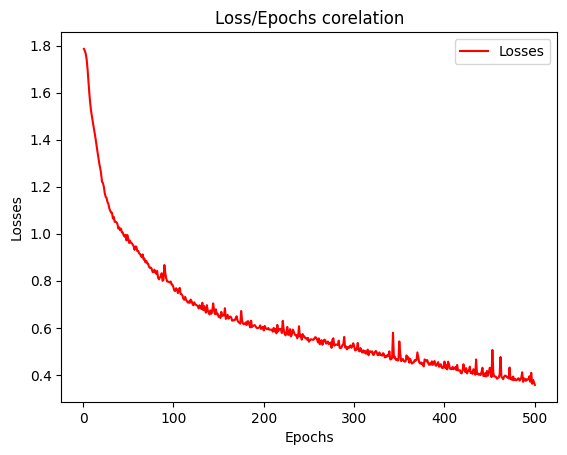

In [247]:
history = model.fit(x_train, y_train, epochs=500, verbose=0)

losses = history.history["loss"]

epochs = range(1, len(losses)+1)

plt.plot(epochs, losses, "r", label = "Losses")
plt.title("Loss/Epochs corelation")
plt.xlabel('Epochs')
plt.ylabel('Losses')
plt.legend()
plt.show()

In [248]:
model.fit(x_train, y_train, epochs=500)

Epoch 1/500
321/321 [==============================] - 0s 490us/step - loss: 0.3570 - accuracy: 0.8473
Epoch 2/500
321/321 [==============================] - 0s 497us/step - loss: 0.3937 - accuracy: 0.8395
Epoch 3/500
321/321 [==============================] - 0s 570us/step - loss: 0.3664 - accuracy: 0.8441
Epoch 4/500
321/321 [==============================] - 0s 455us/step - loss: 0.3991 - accuracy: 0.8324
Epoch 5/500
321/321 [==============================] - 0s 455us/step - loss: 0.3672 - accuracy: 0.8417
Epoch 6/500
321/321 [==============================] - 0s 456us/step - loss: 0.3611 - accuracy: 0.8454
Epoch 7/500
321/321 [==============================] - 0s 477us/step - loss: 0.3741 - accuracy: 0.8423
Epoch 8/500
321/321 [==============================] - 0s 455us/step - loss: 0.3713 - accuracy: 0.8441
Epoch 9/500
321/321 [==============================] - 0s 456us/step - loss: 0.3814 - accuracy: 0.8393
Epoch 10/500
321/321 [==============================] - 0s 446us/step - l

In [249]:
model.evaluate(x_test, y_test)

81/81 [==============================] - 0s 505us/step - loss: 0.2817 - accuracy: 0.8882


[0.2816501557826996, 0.8881527781486511]

In [253]:
preds = model.predict(x_test)
preds_array = []

for pred in preds:
    pred = np.argmax(pred)
    preds_array.append(pred)

preds_array = np.array(preds_array)

81/81 [==============================] - 0s 455us/step


In [254]:
preds_frame = pd.DataFrame({"Predictions": preds_array.squeeze(), "Actuals": y_test.squeeze()})
preds_frame

,Predictions,Actuals
11888,5,5
3050,3,3
3971,2,3
8980,0,0
497,3,2
...,...,...
680,2,2
12738,5,5
6721,4,4
5200,1,1


In [255]:
cm = confusion_matrix(preds_array, y_test)
cm

array([[439,   0,   2,   0,   0,   0],
       [  0, 411,  30,   5,   0,   0],
       [  0,   0, 306, 130,   0,   0],
       [  0,   0,  91, 282,   3,   0],
       [  0,   0,  10,  14, 423,   0],
       [  0,   0,   2,   0,   0, 418]])

Text(120.72222222222221, 0.5, 'Actuals')

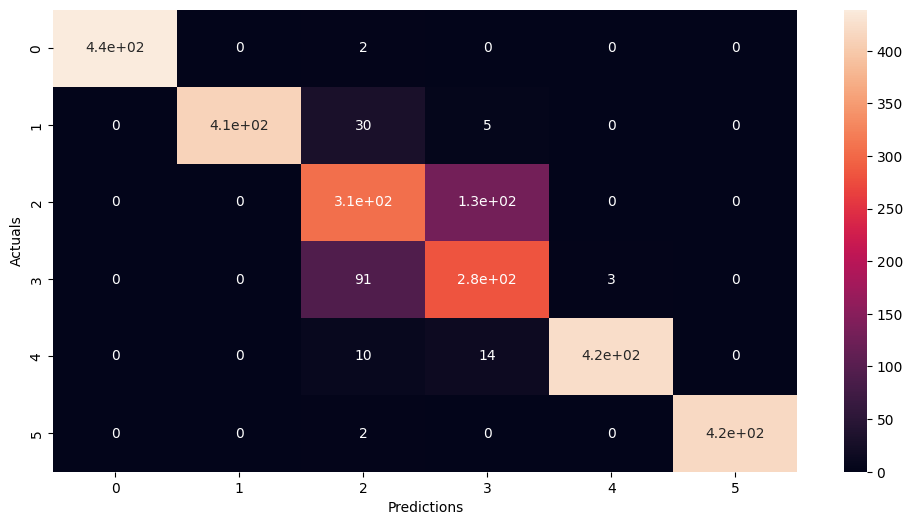

In [258]:
plt.figure(figsize=(12, 6))
sns.heatmap(cm, annot=True)
plt.xlabel("Predictions")
plt.ylabel("Actuals")